<a href="https://colab.research.google.com/github/ignadr/ML-Algorithms-Practice/blob/main/drug_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("prathamtripathi/drug-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/drug-classification


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
print(f"Unique values in 'Sex': {df['Sex'].unique()}")
print(f"Unique values in 'BP': {df['BP'].unique()}")
print(f"Unique values in 'Cholesterol': {df['Cholesterol'].unique()}")

Unique values in 'Sex': ['F' 'M']
Unique values in 'BP': ['HIGH' 'LOW' 'NORMAL']
Unique values in 'Cholesterol': ['HIGH' 'NORMAL']


## Preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Drug', axis=1), df['Drug'], test_size=0.2, random_state=42)

In [ ]:
ordinal_cols = ['BP', 'Cholesterol']
nominal_cols = ['Sex']
numerical_cols = ['Age', 'Na_to_K']

In [ ]:
# Give an order to ordinal data
bp_order = ['LOW', 'NORMAL', 'HIGH'] # expected order [0, 1, 2]
chol_order = ['NORMAL', 'HIGH'] # expected order [0, 1]

In [ ]:
ct = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=[bp_order, chol_order]), ordinal_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols),
        ('standard_scaler', StandardScaler(), numerical_cols),
    ],
    remainder='passthrough' # Any columns not specified in transformers are passed through
)

le = LabelEncoder()

In [ ]:
X_train_enc = ct.fit_transform(X_train)
X_test_enc = ct.transform(X_test)

In [ ]:
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

## Logistic regression model

In [ ]:
# Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_enc, y_train_enc)

LogisticRegression(random_state=42)

In [ ]:
print(f"Accuracy on training set: {lr.score(X_train_enc, y_train_enc)}")

Accuracy on training set: 0.9375


In [ ]:
# Predict
y_pred = lr.predict(X_test_enc)

In [ ]:
print(f"Accuracy on test set: {accuracy_score(y_test_enc, y_pred)}")

Accuracy on test set: 0.875


## Try simple neural network

In [ ]:
# Amount of training data and features
X_train_enc.shape

(160, 6)

In [ ]:
# Number of possible outputs
print(f"Number of classes: {len(np.unique(y_train_enc))}")

Number of classes: 5


In [ ]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow. Source: https://stackoverflow.com/questions/60058588/tensorflow-2-0-tf-random-set-seed-not-working-since-i-am-getting-different-resul
os.environ['PYTHONHASHSEED']=str(2)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import random

In [ ]:
# Function to reproduce same result. Source: https://stackoverflow.com/questions/60058588/tensorflow-2-0-tf-random-set-seed-not-working-since-i-am-getting-different-resul
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(2)
   tf.random.set_seed(2)
   np.random.seed(2)
   random.seed(2)

In [ ]:
def run_nn(X, y):
  reset_random_seeds()
  model = Sequential([
      tf.keras.Input(shape=(6, )), # Expect 6 features
      Dense(units=6, activation='relu'),
      Dense(units=5, activation='linear'), # There are 5 possible classes
  ])

  model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
  )

  model.fit(X_train_enc, y_train_enc, epochs=200)

  return model

In [ ]:
model = run_nn(X_train_enc, y_train_enc)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9053 - sparse_categorical_accuracy: 0.2616
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1474 - sparse_categorical_accuracy: 0.6301
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8913 - sparse_categorical_accuracy: 0.7038 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7129 - sparse_categorical_accuracy: 0.7536 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6292 - sparse_categorical_accuracy: 0.7646 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5253 - sparse_categorical_accuracy: 0.7727 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4336 - sparse_categorical_accuracy: 0.8283 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3565 - sparse_categorical_accuracy: 0.8545 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2957 - sparse_categorical_accuracy: 0.8948 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2470 - sparse

In [ ]:
# Test if the code is reproducible
test_model = run_nn(X_train_enc, y_train_enc)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9053 - sparse_categorical_accuracy: 0.2616  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1474 - sparse_categorical_accuracy: 0.6301 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8913 - sparse_categorical_accuracy: 0.7038 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7129 - sparse_categorical_accuracy: 0.7536 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6292 - sparse_categorical_accuracy: 0.7646 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5253 - sparse_categorical_accuracy: 0.7727 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4336 - sparse_categorical_accuracy: 0.8283 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3565 - sparse_categorical_accuracy: 0.8545 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2957 - sparse_categorical_accuracy: 0.8948 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2470 - spars

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy'])

In [ ]:
# Predict
logits = model(X_test_enc)
y_pred = tf.nn.softmax(logits)

In [ ]:
y_pred_numpy = y_pred.numpy()

In [ ]:
# Get only the index with the highest probability
y_pred_nn = np.argmax(y_pred_numpy, axis=1)

In [ ]:
accuracy_score(y_test_enc, y_pred_nn)

1.0

In [ ]:
cm = confusion_matrix(y_test_enc, y_pred_nn)
cm

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 11]])

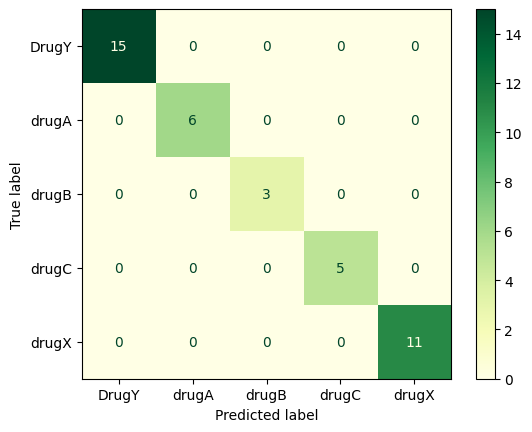

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='YlGn')